In [1]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

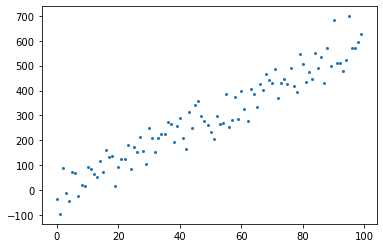

In [2]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [3]:
%matplotlib notebook 
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


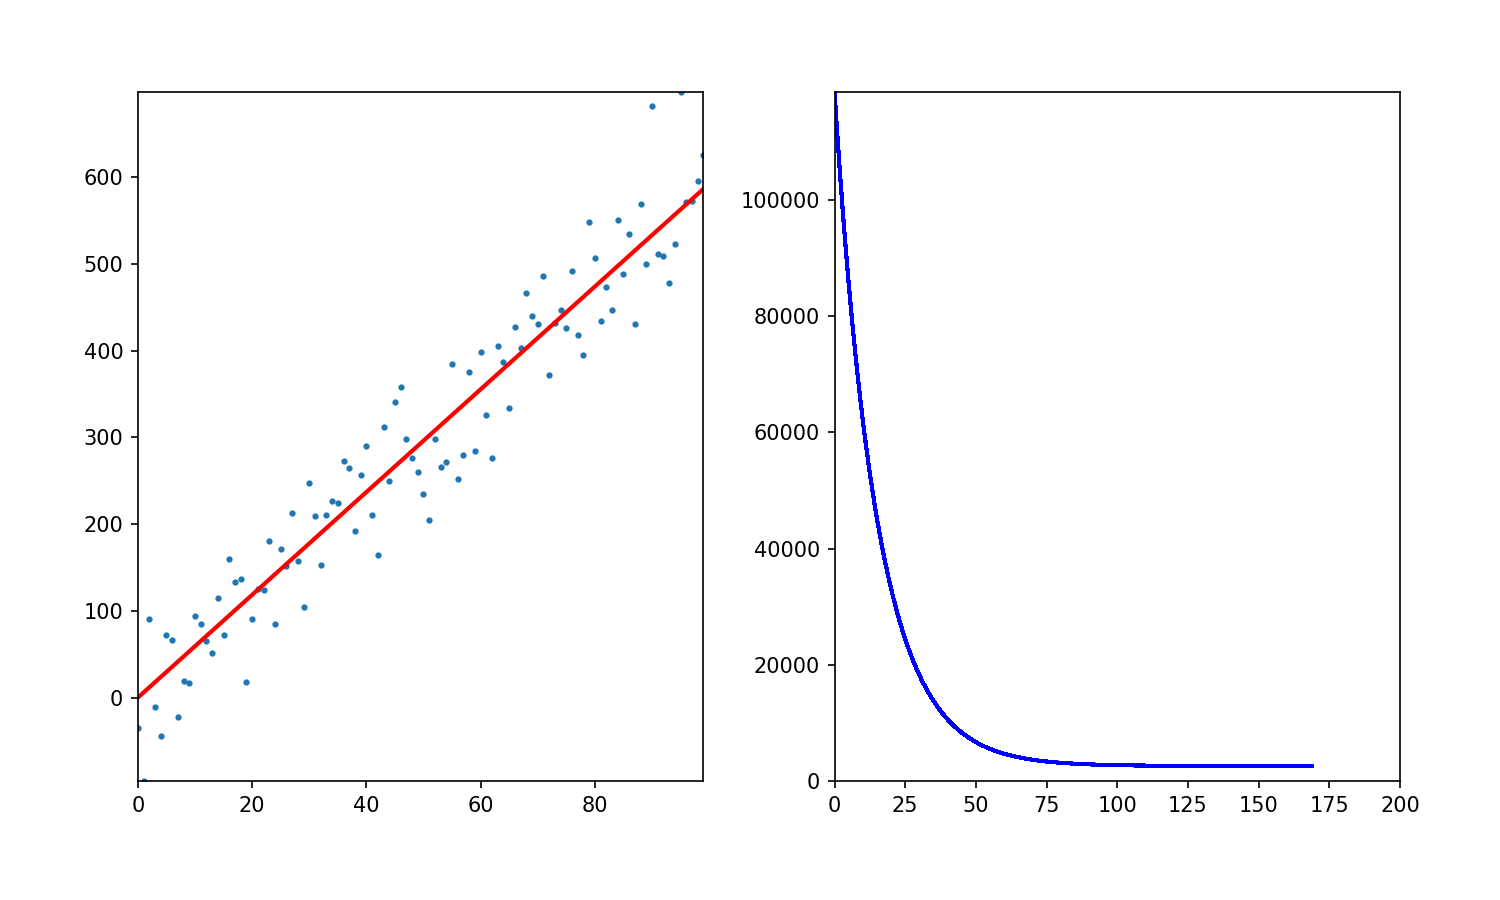

In [4]:
###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)


In [7]:
b_current = 0 
m_current = 0

learningRate = 0.00001
num_iteration = 200 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    if(i % 1 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 100.0
Iteration No.= 0  m =  0.19518386258959164  b= 0.0029272474411076947  Cost= 118615.61005161722
Iteration No.= 1  m =  0.3839574140635707  b= 0.005757849597759129  Cost= 111119.69547188317
Iteration No.= 2  m =  0.5665311848268342  b= 0.008494980540409378  Cost= 104108.06418324367
Iteration No.= 3  m =  0.7431087909472692  b= 0.011141710095222385  Cost= 97549.42843488033
Iteration No.= 4  m =  0.9138871612396102  b= 0.013701007267710228  Cost= 91414.52186174072
Iteration No.= 5  m =  1.0790567568913016  b= 0.01617574355393164  Cost= 85675.96889028612
Iteration No.= 6  m =  1.2388017838753083  b= 0.018568696142942598  Cost= 80308.16258145115
Iteration No.= 7  m =  1.3933003983867633  b= 0.020882551014070584  Cost= 75287.15036571688
Iteration No.= 8  m =  1.5427249055325736  b= 0.02311990593246669  Cost= 70590.5271604184
Iteration No.= 9  m =  1.6872419514955665  b= 0.025283273346276437  Cost= 66197.33539234728
Iteration No.= 10  m =  1.8270127093874948  b= 0.02737508318

Iteration No.= 90  m =  5.658434752412944  b= 0.08390381806081065  Cost= 2875.5678350778744
Iteration No.= 91  m =  5.667782377517117  b= 0.08402930126129333  Cost= 2857.1886830715825
Iteration No.= 92  m =  5.676823011236809  b= 0.08415015613251745  Cost= 2839.99693696222
Iteration No.= 93  m =  5.685566735925155  b= 0.0842665346815016  Cost= 2823.915882850095
Iteration No.= 94  m =  5.694023302805977  b= 0.08437858392297952  Cost= 2808.8737630366068
Iteration No.= 95  m =  5.7022021428488925  b= 0.08448644604335903  Cost= 2794.8034558224495
Iteration No.= 96  m =  5.710112377287249  b= 0.08459025855929608  Cost= 2781.642175992852
Iteration No.= 97  m =  5.717762827790627  b= 0.084690154471061  Cost= 2769.3311946533586
Iteration No.= 98  m =  5.72516202630325  b= 0.08478626241086762  Cost= 2757.8155771660017
Iteration No.= 99  m =  5.732318224559282  b= 0.0848787067863311  Cost= 2747.0439380164185
Iteration No.= 100  m =  5.73923940328561  b= 0.08496760791921408  Cost= 2736.9682115181